In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Any results you write to the current directory are saved as output.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Exploration of training data

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Features: Age, Fare. Discrete: SibSp, Parch are numerical. Others are mixed data types (combination of strings and objects)

### Age and Cabin columns have a lot of missing values.

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Distribution of data

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Using groupby to get the impact of different features and distribution across categories

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Vizualizations

## Distribution of Age

C:\Users\pande\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


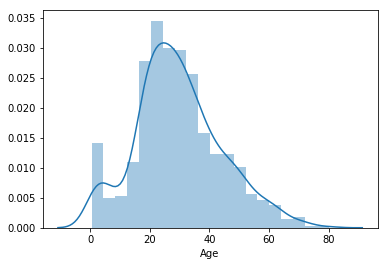

In [10]:
sns.distplot(train_df.Age.dropna())

## Distribution of Fare

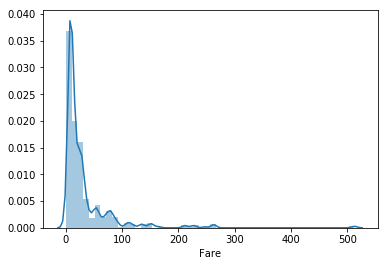

In [11]:
sns.distplot(train_df.Fare.dropna())

## Embarked vs Pclass

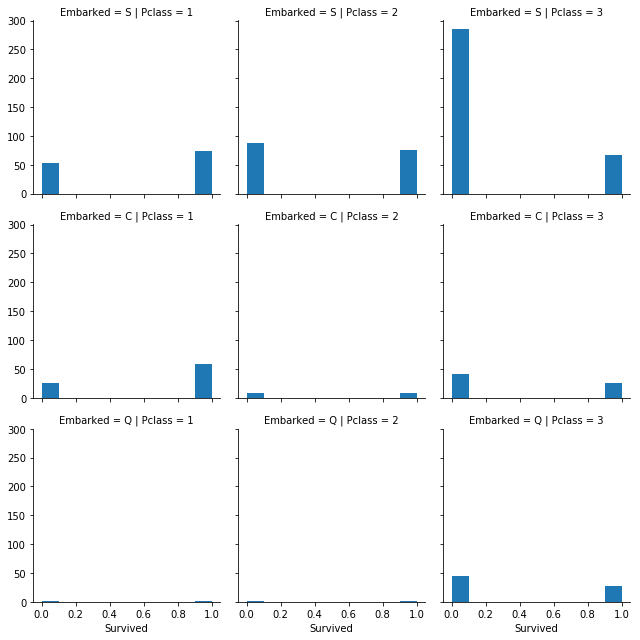

In [12]:
g= sns.FacetGrid(data = train_df, row = 'Embarked', col='Pclass')
g.map(plt.hist, "Survived")

## Embarked vs Sex

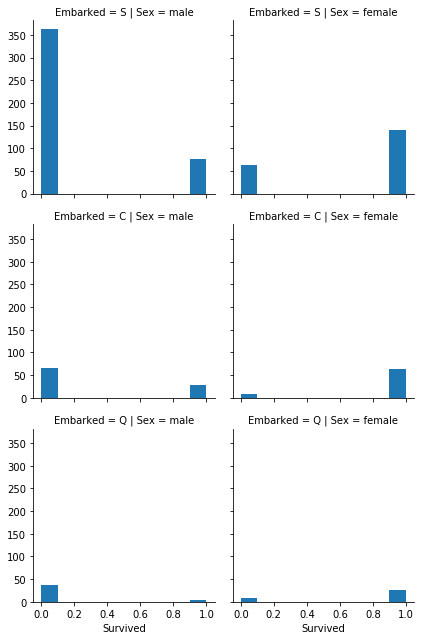

In [13]:
g= sns.FacetGrid(data = train_df, row = 'Embarked', col='Sex')
g.map(plt.hist, "Survived")

### Create new title 

In [14]:
train_df['Title'] = train_df.Name.str.extract('.*, (.*\.) .*')
train_df['Title'] = train_df['Title'].str.strip()

In [15]:
train_df['Title'].value_counts()

Mr.                          517
Miss.                        182
Mrs.                         124
Master.                       40
Dr.                            7
Rev.                           6
Mlle.                          2
Col.                           2
Major.                         2
Lady.                          1
Mrs. Martin (Elizabeth L.      1
Don.                           1
Capt.                          1
the Countess.                  1
Jonkheer.                      1
Ms.                            1
Mme.                           1
Sir.                           1
Name: Title, dtype: int64

In [16]:
train_df[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
9,Mlle.,1.000000
10,Mme.,1.000000
16,Sir.,1.000000
14,Ms.,1.000000
13,Mrs. Martin (Elizabeth L.,1.000000
17,the Countess.,1.000000
5,Lady.,1.000000
12,Mrs.,0.790323
8,Miss.,0.697802
7,Master.,0.575000


## I realized that the title feature doesn't add much information since it is very similar to the Sex feature and having both of them is redundant

### Clean age feature by filling the NAs with median 

In [17]:

train_df.Age.fillna(float(train_df.Age.median()), inplace=True)


test_df.Age.fillna(float(test_df.Age.median()), inplace=True)

### Refine the cabin feature

The logic is to distinguish all the cabin passengers from all the coach passengers. This is informative since the coach pasengers would have a preference in evacuation over coach passengers.

In [18]:
# All cabins 1  all coach and other classes (NA) are 0
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
train_df.Cabin =  train_df.Cabin.notnull().astype('int')
test_df.Cabin =  test_df.Cabin.notnull().astype('int')

In [20]:
# My hypothesis is supported by this. 
train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
1,1,0.666667
0,0,0.299854


### Cabin passengers are more than three times more likely to survive than the coach passengers

### Creating the Embarked feature

In [21]:
train_df['Embarked'] = train_df.Embarked.map({'S':0, 'C':1, 'Q':3})
test_df['Embarked'] = test_df.Embarked.map({'S':0, 'C':1, 'Q':3})

### Creating the sex feature

In [22]:
train_df['Sex'] = train_df.Sex.map({'male': 0, 'female': 1})
test_df['Sex'] = test_df.Sex.map({'male': 0, 'female': 1})

In [23]:
train_df.Age = train_df.Age.astype(float, errors = 'ignore')
test_df.Age = test_df.Age.astype(float, errors = 'ignore')

In [24]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked       float64
Title           object
dtype: object

## Forward fill the NA values in the Fare feature

In [25]:
train_df.fillna(method='ffill', inplace= True)
test_df.fillna(method='ffill',  inplace= True)

## Now we need to drop the 2 rows that don't have the Embarked feature

In [26]:
train_df.dropna(inplace= True)
# test_df.dropna(inplace= True)

# Modeling 

In [27]:
from sklearn.linear_model import LogisticRegression
lgcls = LogisticRegression()

X_train = train_df[['Pclass', 'SibSp', 'Parch', 'Age', 'Sex', 'Fare', 'Cabin', 'Embarked']]
Y_train = train_df.Survived

X_test = test_df[['Pclass', 'SibSp', 'Parch', 'Age', 'Sex', 'Fare', 'Cabin', 'Embarked']]

In [28]:
X_test.isna().sum()

Pclass      0
SibSp       0
Parch       0
Age         0
Sex         0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [29]:
lgcls.fit(X_train, Y_train)

C:\Users\pande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred = lgcls.predict(X_test)

In [31]:
passId = test_df.PassengerId
submissions = pd.DataFrame({'PassengerId': passId, 'Survived':pred})
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [32]:
submissions.to_csv("submissions_titanic.csv", index=None)